<a href="https://colab.research.google.com/github/dmika1234/dl_uwr/blob/develop/Assignments/Assignment2/colab_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import time
from IPython.display import clear_output
from tqdm.auto import tqdm
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.datasets
from torch import nn

In [2]:
# Colab
%load_ext autoreload
%autoreload
import httpimport
with httpimport.github_repo(
     "dmika1234", "dl_uwr", "develop"
):
     from Assignments.Assignment2.funs import compute_error_rate, plot_history, create_mnist_loaders, SGD, Model, exp_schedule, div_schedule

ImportError: ignored

In [ ]:
# On GPU enabled devices set device='cuda' else set device='cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Data download

In [ ]:
batch_size = 128
data_path = "./data"
mnist_loaders = create_mnist_loaders(batch_size=batch_size, data_path=data_path, download=True)

### Defining model

In [ ]:
model = Model(nn.Linear(28 * 28, 1000),
              nn.ReLU(),
              nn.Linear(1000, 1000),
              nn.ReLU(),
              nn.Linear(1000, 10))
model.init_params_xavier()

In [ ]:
# lr_schedule = (partial(exp_schedule, beta=0.9, warmups=6), "epochs")
# lr_schedule = (div_schedule, "batch_iters")
lr_schedule = (None, None)

In [ ]:
alpha = 1e-1
epsilon = 0.9
decay=0.0
max_num_epochs = 30

### Training

----------------------------------------------------------
After epoch 17 | valid err rate:  1.99% | doing  17 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 11)

--------------------------------------------
Test error rate: 1.890%, training took 448s.
--------------------------------------------


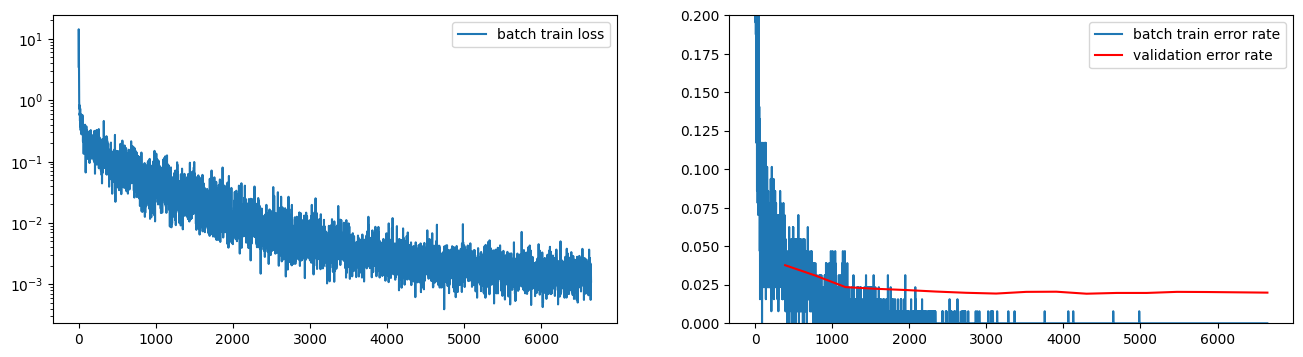

In [31]:
t_start = time.time()
val_err = SGD(model, mnist_loaders,
    alpha=alpha, epsilon=epsilon, lr_schedule=lr_schedule, decay=decay,
    max_num_epochs=max_num_epochs, device=device)
##
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
##